Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

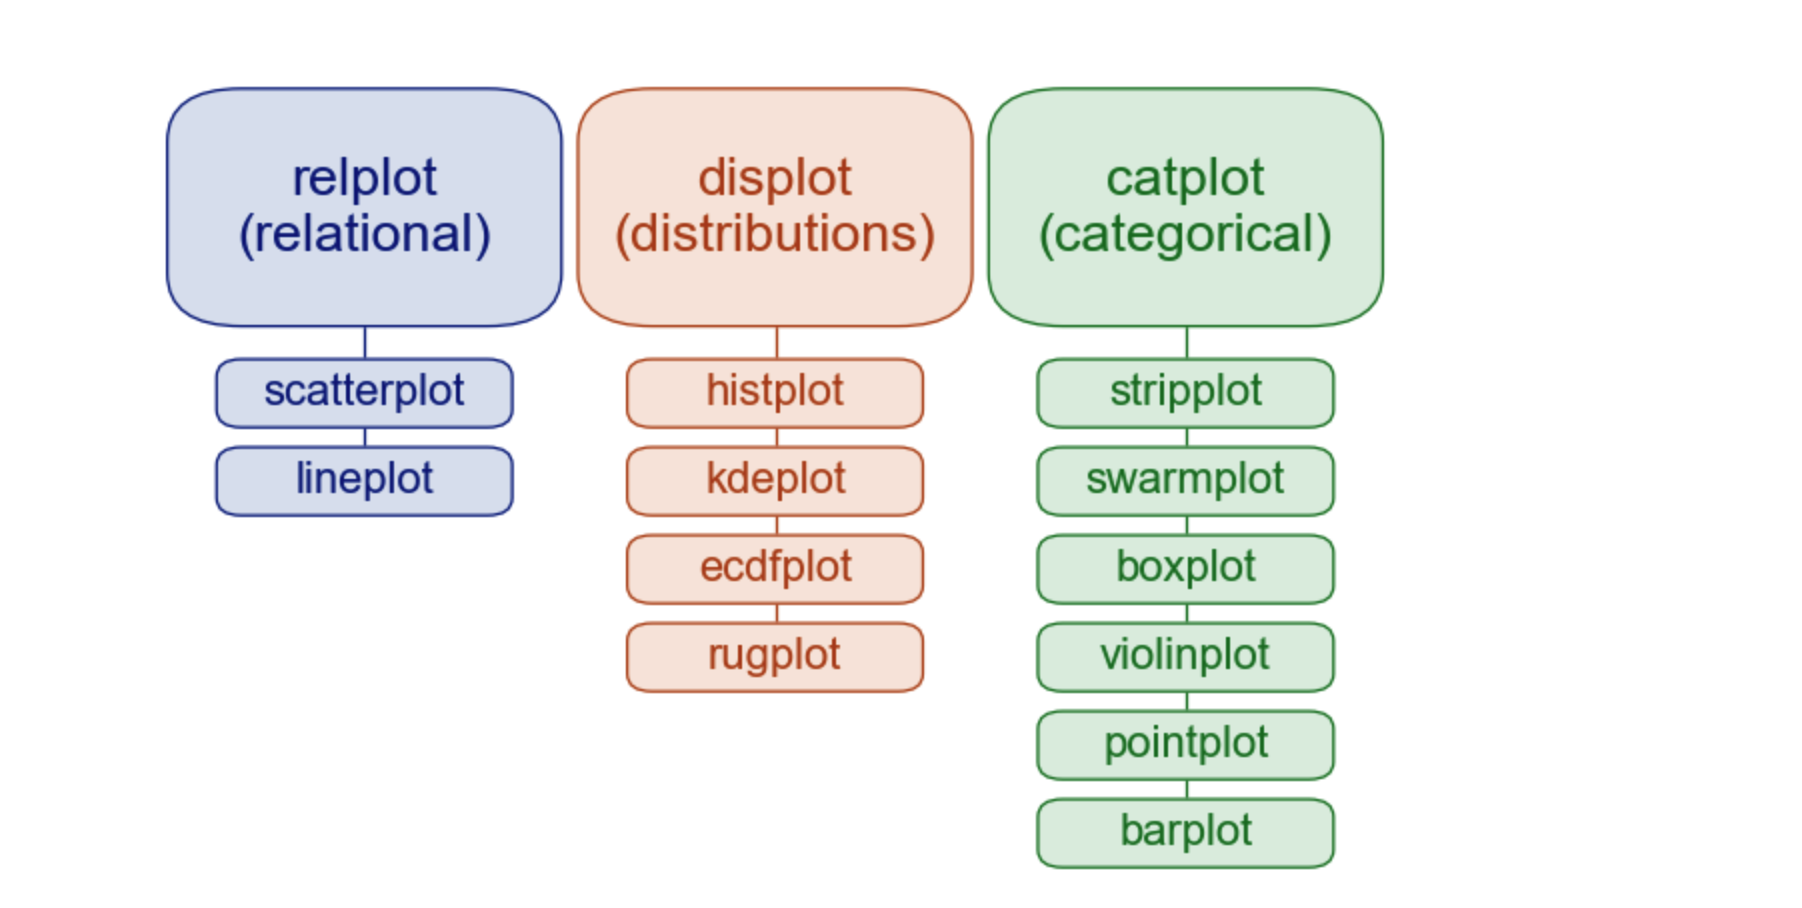

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [2]:
# look for all datasets available in seaborn

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
# Option 1 : Load directly from sns dataset using load_dataset
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# Option 2: Load using pydataset
from pydataset import data
data('tips', show_doc=True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [9]:
# check out our dataframe
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [10]:
# tips info
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discrete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

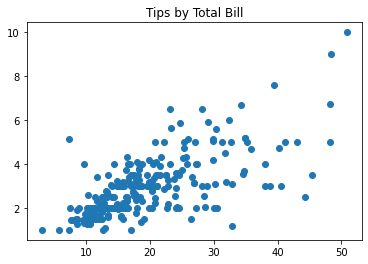

In [13]:
# scatterplot in matplotlib
plt.scatter(tips.total_bill, tips.tip)
plt.title('Tips by Total Bill')
plt.show()

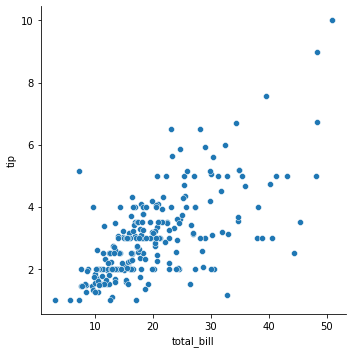

In [16]:
# Explore relationship between total_bill and tip using relplot
# instead of two series,
# Specify your data
# specify the strings that represent your x and y
sns.relplot(data=tips, x='total_bill', y='tip')
plt.show()


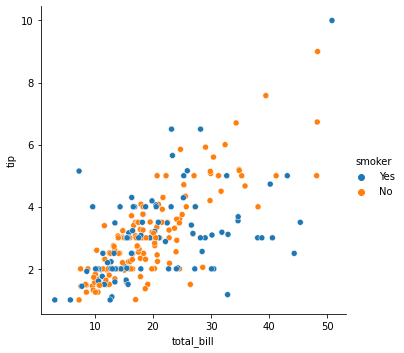

In [17]:
# visualize if relationship is different for smoker 
# vs non-smoker (use hue argument)
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker')


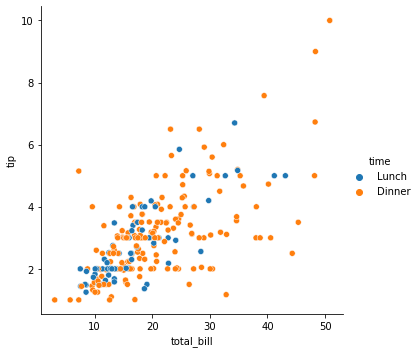

In [18]:
# using 'time' column as hue now
sns.relplot(
    data=tips, 
    x='total_bill', 
    y='tip', 
    hue='time')


In [ ]:
# observational note: why is lunchtime tip lumped in groups?
# we are likely going to investigate this further to see if
# there is any extra information to compound here.


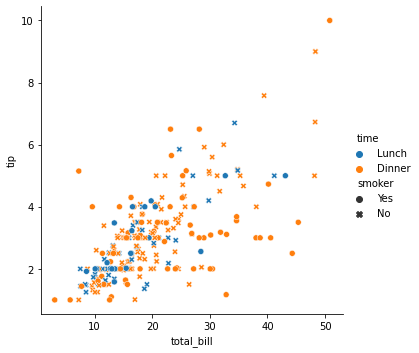

In [19]:
# Style argument: extra dimension
sns.relplot(
    data=tips, 
    x='total_bill', 
    y='tip', 
    hue='time',
    style='smoker')

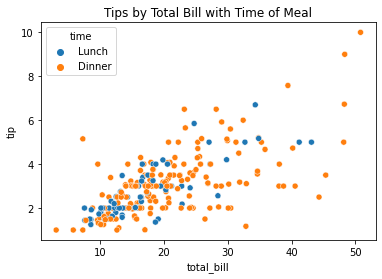

In [21]:
# scatterplot - returns an axes level object
sns.scatterplot(data=tips,
               x='total_bill',
               y='tip',
               hue='time')
plt.title('Tips by Total Bill with Time of Meal')
plt.show()


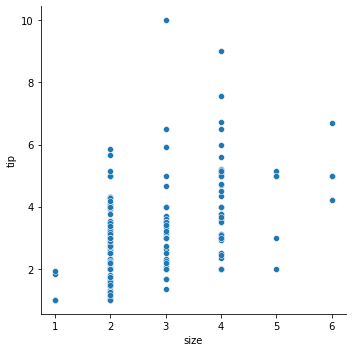

In [22]:
# relplot with discrete variable ('size')
sns.relplot(data=tips,
           x='size',
           y='tip')


## Kind

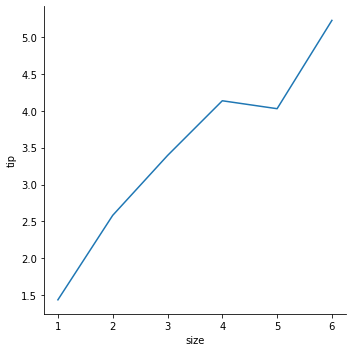

In [25]:
# lineplot - may not be appropriate in this case. Note use of 'kind' argument

sns.relplot(data=tips,
           x='size',
           y='tip',
           kind='line',
           ci=None)
plt.show()

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

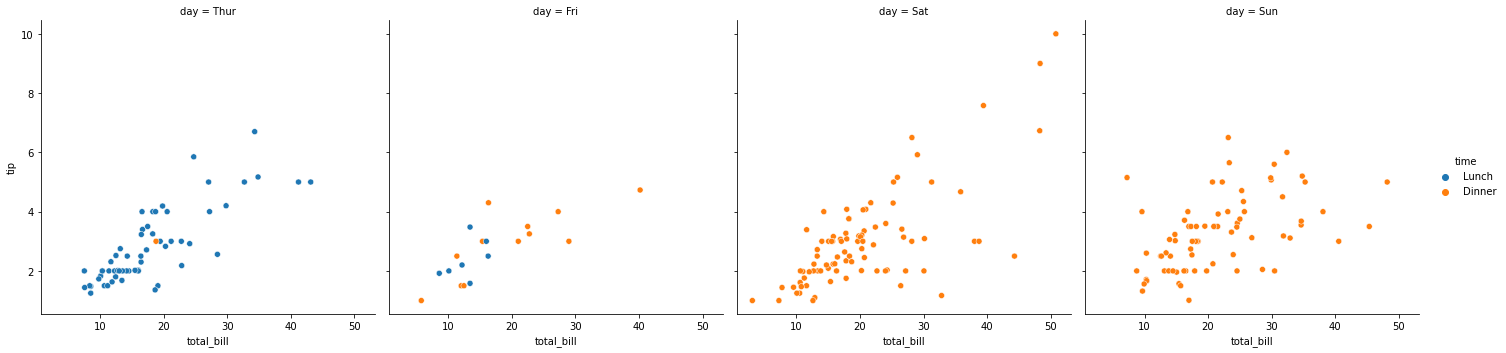

In [27]:
#  FacetGrid with 'col'
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'
sns.relplot(data=tips,
          x='total_bill',
          y='tip',
          hue='time',
          col='day'
          )


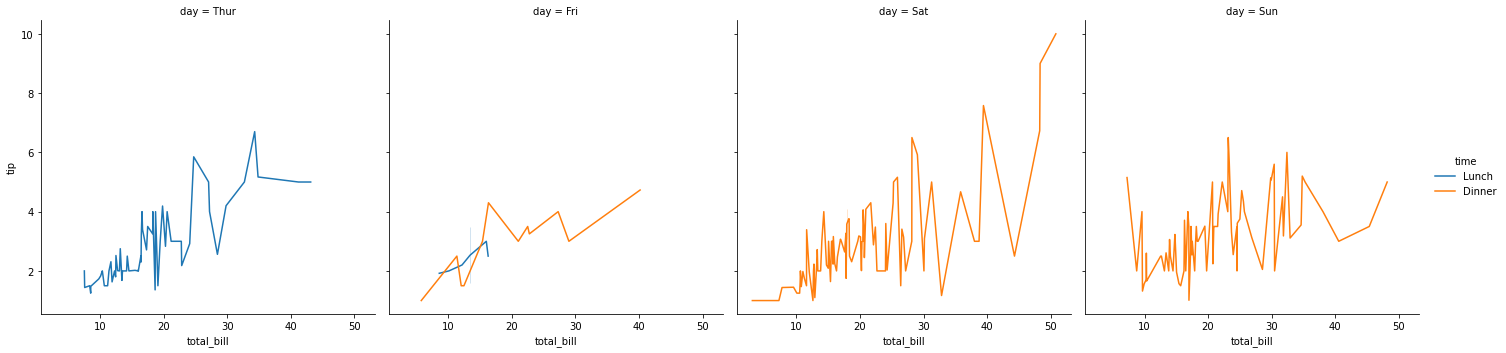

In [29]:
# Facetgrid with lineplot
sns.relplot(data=tips,
          x='total_bill',
          y='tip',
          hue='time',
          col='day',
          kind='line'
          )

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


### Distributions

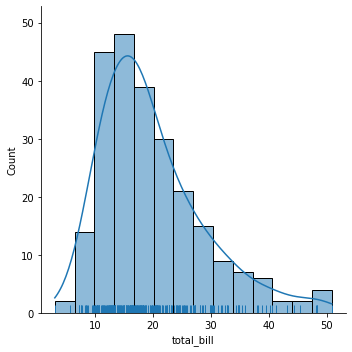

In [32]:
# displot (hist, kde, rug)
sns.displot(
    data=tips,
    x='total_bill',
    kde=True,
    rug=True)


In [ ]:
# kde = probability of finding a observartions at particular 
# value of x.
# Smooth out version of histogram. 
# Estimating probabilty density function (PDF) 
# in a non-parametric way.


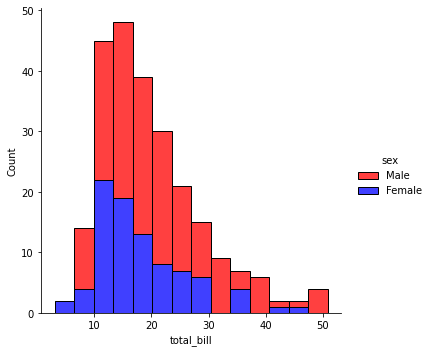

In [37]:
# histogram with hue and stacking
sns.displot(
    data=tips,
    x='total_bill',
    hue='sex',
    multiple='stack',
    palette=['r','b']
)

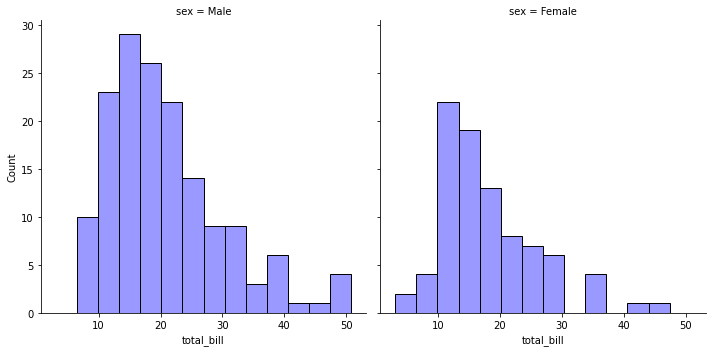

In [38]:
# use 'col' argument to create 'small multiples'
sns.displot(
    data=tips,
    x='total_bill',
    col='sex',
    color='blue',
    alpha=0.4)


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

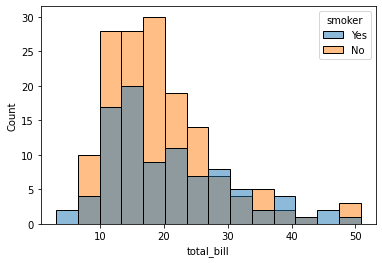

In [41]:
#histplot will return an axes level object
sns.histplot(data=tips,
            x='total_bill',
            hue='smoker')

### Categorial Plots

#### Boxplots

In [ ]:
#  FacetGrid with 'col'

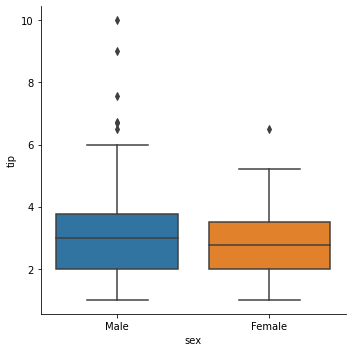

In [43]:
sns.catplot(
data=tips,
x='sex',
y='tip',
kind='box')

In [45]:
# sns.dogplot()

<AxesSubplot:ylabel='tip'>

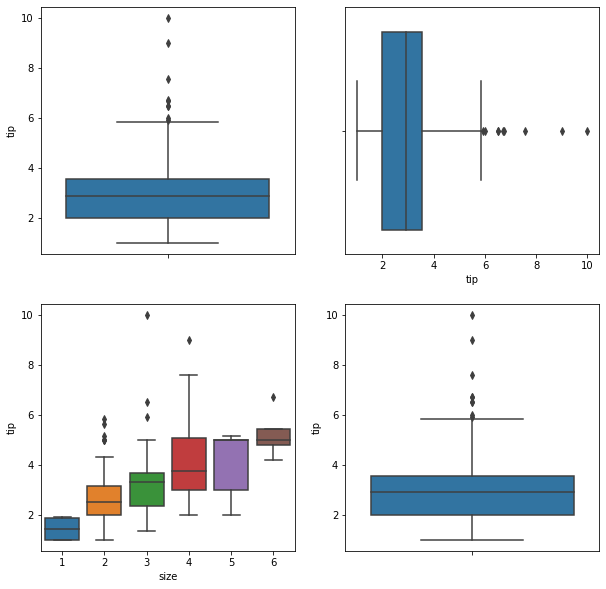

In [68]:
# create subplots
# plt.subplots instead of plt.subplot
# why? because we need the axis object

# we define the shape of our subplot figure : 2x2

# old method: plt.subplot(2,2,1)
fig, ax = plt.subplots(2,2, figsize=(10,10))
# rather than 1-4, treat the dimensions as 
# typical python zero-indexed arrays
sns.boxplot(data=tips, y='tip', ax=ax[0,0])
sns.boxplot(data=tips, x='tip', ax=ax[0,1])
sns.boxplot(data=tips, x='size', y='tip', ax=ax[1,0])
sns.boxplot(data=tips, y='tip', hue='smoker', ax=ax[1,1])

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

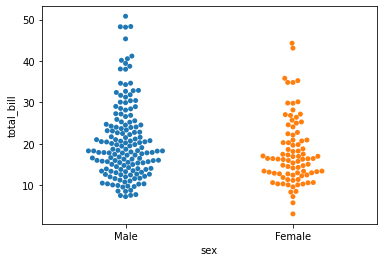

In [54]:
# swarmplot
sns.swarmplot(data=tips,
             y='total_bill',
             x='sex')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

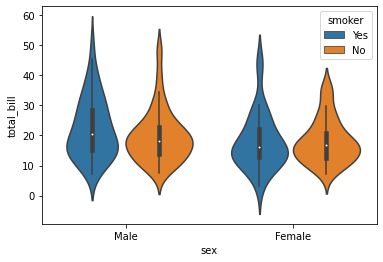

In [55]:
# violin plot
sns.violinplot(
data=tips,
y='total_bill',
x='sex',
hue='smoker')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

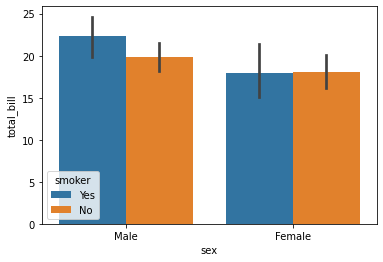

In [65]:
# bar plot. Shows mean for each category instead with CI
sns.barplot(
data=tips,
y='total_bill',
x='sex',
hue='smoker',
ci=95)

#### Pairplot

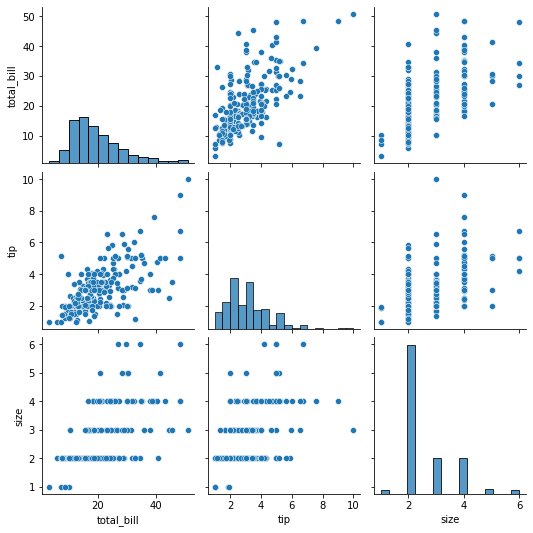

In [67]:
# pairplot for whole dataframe
sns.pairplot(tips)

# if you have a large amount of data:
# remember .sample()!!!!

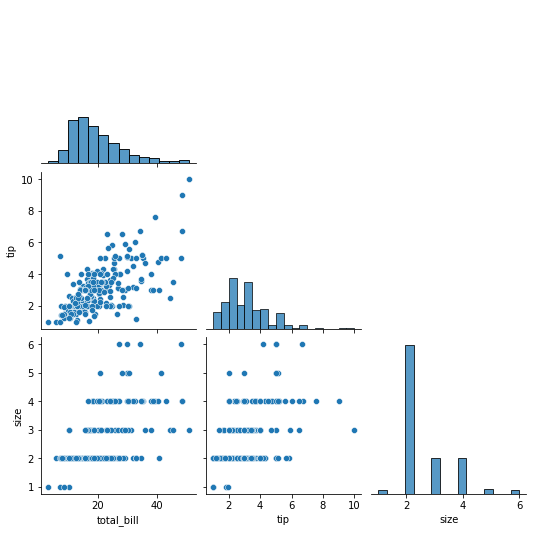

In [68]:
# argument corner = True will not render duplicate plots
sns.pairplot(tips, corner=True)

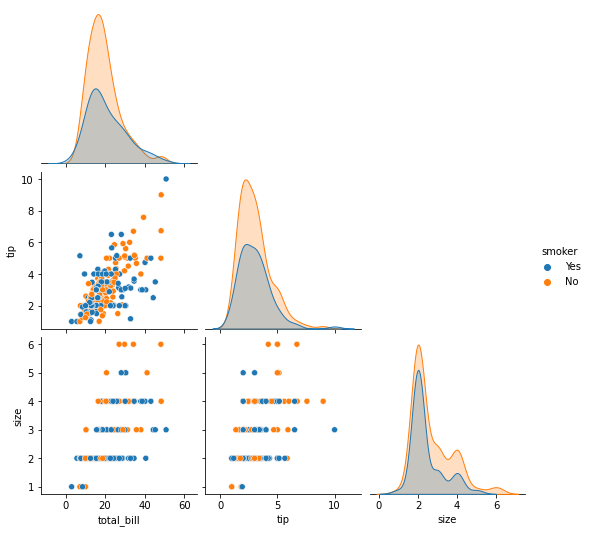

In [69]:
# use hue argument to visualize relationship based of different categories
sns.pairplot(data=tips, corner=True, hue='smoker')

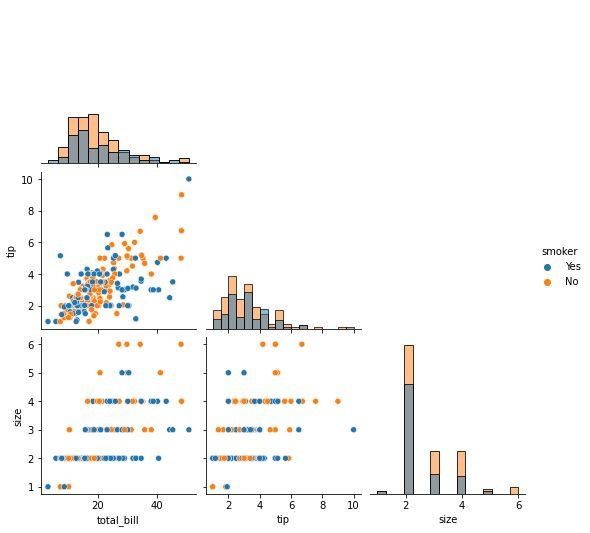

In [70]:
# we can limit the number of variable to plot using vars argument
sns.pairplot(tips, hue='smoker', diag_kind='hist', corner=True)

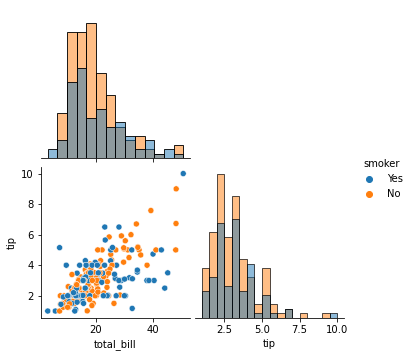

In [72]:
sns.pairplot(data=tips,
             hue='smoker',
             vars=['total_bill', 'tip'],
             diag_kind='hist',
             corner=True)

#### Jointplot

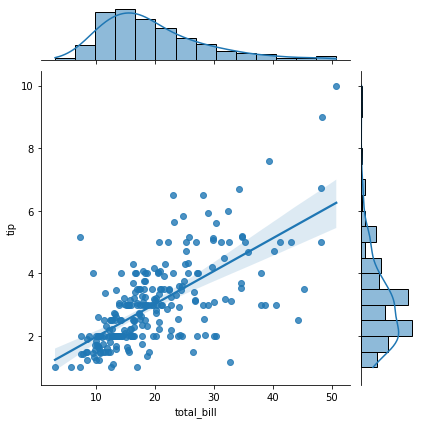

In [76]:
# joint plot
sns.jointplot(
data=tips,
x='total_bill',
y='tip',
kind='reg')

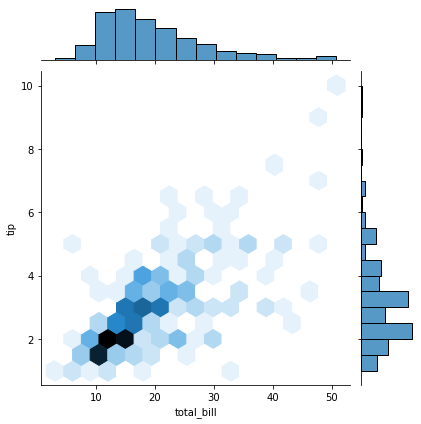

In [77]:
# joint plot with hex
# joint plot
sns.jointplot(
data=tips,
x='total_bill',
y='tip',
kind='hex')

#### Heatmap

In [82]:
#crosstab
pd.crosstab(tips.time, tips.smoker,margins=True)

smoker,Yes,No,All
time,,,
Lunch,23,45,68
Dinner,70,106,176
All,93,151,244


<AxesSubplot:xlabel='smoker', ylabel='time'>

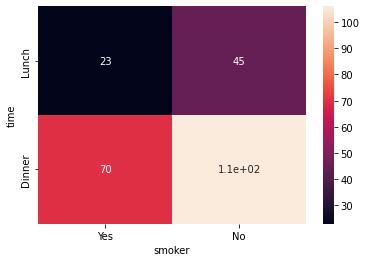

In [85]:
#create a heatmap
ctab = pd.crosstab(tips.time, tips.smoker)
sns.heatmap(ctab, annot=True)

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

In [86]:
# Heatmap using mpg dataset
mpg = data('mpg')


In [87]:
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [99]:
# correlation
labels = ['Displacement', 'Model Year', 'Cylinders', 'City MPG', 'Highway MPG']


In [89]:
mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


<AxesSubplot:>

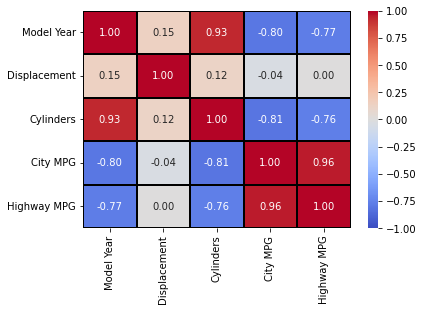

In [100]:
# heatmap for correlation table above
sns.heatmap(mpg.corr(),
           annot=True,
           cmap='coolwarm',
           vmax=1,
           vmin=-1,
           center=0,
           linewidth=1,
           linecolor='k',
           fmt='.2f',
           xticklabels=labels,
           yticklabels=labels)